# CSE474/574 - Programming Assignment 1

For grading, we will execute the submitted notebook as follows:

```shell
jupyter nbconvert --to python PA1Script.ipynb
python PA1Script.py
```

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pickle
from random import sample 


## Part 1 - Linear Regression

### Problem 1 - Linear Regression with Direct Minimization

In [2]:
print('PROBLEM 1')
print('----------')

PROBLEM 1
----------


In [3]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    w = np.dot(np.linalg.inv(np.dot(np.transpose(X),X)), np.dot(np.transpose(X),y))

    return w

In [6]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # rmse = scalar value

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    x = Xtest.shape[0]
    rmse = np.sqrt((1/x)*np.dot(np.transpose(np.subtract(ytest, np.dot(Xtest,w))),np.subtract(ytest, np.dot(Xtest,w))))
    
    return rmse

In [7]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
x1 = np.ones((len(Xtrain),1))
x2 = np.ones((len(Xtest),1))

Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
w = learnOLERegression(Xtrain,ytrain)
w_i = learnOLERegression(Xtrain_i,ytrain)
rmse = testOLERegression(w,Xtrain,ytrain)
rmse_i = testOLERegression(w_i,Xtrain_i,ytrain)
print('RMSE without intercept on train data - %.2f'%rmse)
print('RMSE with intercept on train data - %.2f'%rmse_i)

rmse = testOLERegression(w,Xtest,ytest)
rmse_i = testOLERegression(w_i,Xtest_i,ytest)
print('RMSE without intercept on test data - %.2f'%rmse)
print('RMSE with intercept on test data - %.2f'%rmse_i)


RMSE without intercept on train data - 138.20
RMSE with intercept on train data - 46.77
RMSE without intercept on test data - 326.76
RMSE with intercept on test data - 60.89


### Problem 2 - Linear Regression with Gradient Descent

In [8]:
print('PROBLEM 2')
print('----------')

PROBLEM 2
----------


In [9]:
def regressionObjVal(w, X, y):

    # compute squared error (scalar) with respect
    # to w (vector) for the given data X and y      
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar value

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE]=
    #print(w.shape[0])
    w = w.reshape(w.shape[0], 1)
    error = (0.5)*np.dot(np.transpose(np.subtract(y, np.dot(X,w))),np.subtract(y, np.dot(X,w)))
    
    a1 = np.dot(X,w)
    a2 = np.subtract(y,a1)
    a3 = np.transpose(a2)
    a4 = np.dot(a3,a1)
    a5 = 0.5*a4
    return error


In [10]:
def regressionGradient(w, X, y):

    # compute gradient of squared error (scalar) with respect
    # to w (vector) for the given data X and y   
    
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # gradient = d length vector (not a d x 1 matrix)

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE 
    J = np.subtract(np.dot(np.dot(np.transpose(X), X), w), np.dot(np.transpose(X), y))
    x= np.dot(np.transpose(X),X)
    y1 = np.dot(x,w)
    z = np.dot(np.transpose(X),y)
    a = z.reshape(z.shape[0],)
    error_grad = np.subtract(y1,a)
    return error_grad

In [11]:

Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
rmse = testOLERegression(w,Xtrain_i,ytrain)
print('Gradient Descent Linear Regression RMSE on train data - %.2f'%rmse)
rmse = testOLERegression(w,Xtest_i,ytest)
print('Gradient Descent Linear Regression RMSE on test data - %.2f'%rmse)


Gradient Descent Linear Regression RMSE on train data - 48.23
Gradient Descent Linear Regression RMSE on test data - 54.69


In [12]:
## Part 2 - Linear Classification

### Problem 3 - Perceptron using Gradient Descent

In [13]:
print('PROBLEM 3')
print('----------')



PROBLEM 3
----------


In [14]:
def predictLinearModel(w,Xtest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # Output:
    # ypred = N x 1 vector of predictions
    #np.append(ypred,[[1]],axis=0)
    #print(ypred)
    ypred = np.array([[100]])


    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    for x in Xtest:
        y = np.dot(np.transpose(w),x)
        if y >= 0:
            ypred = np.append(ypred,[[1]],axis = 0)
        else:
            ypred = np.append(ypred,[[-1]],axis =0)
    
    ypred = ypred[1:]
    return ypred

In [15]:
def evaluateLinearModel(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # acc = scalar values
    count = 0
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    y = predictLinearModel(w,Xtest)
    #print(y)
    inputincrement = 0
    for i in ytest:
        j = y[inputincrement][0]
        #print(j)
        if i==j:
            count = count + 1
        inputincrement = inputincrement + 1
    
    acc = (count/Xtest.shape[0])*100
    return acc

In [16]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.
w_init = np.zeros((Xtrain_i.shape[1],1))
#print(w.shape)
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
w_perceptron1 = w             #copies the w value to w_perceptron to plot the line  "extra line"
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Perceptron Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Perceptron Accuracy on test data - %.2f'%acc)

Perceptron Accuracy on train data - 84.00
Perceptron Accuracy on test data - 84.00


### Problem 4 - Logistic Regression Using Newton's Method

In [17]:
print('PROBLEM 4')
print('----------')

PROBLEM 4
----------


In [18]:
def logisticObjVal(w, X, y):

    # compute log-loss error (scalar) with respect
    # to w (vector) for the given data X and y                               
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar
    
    
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    yi = 0
    sum = 0
    n = X.shape[0]
    for x,yv in zip(X,y):
        sum = sum + np.log(1+np.exp(np.negative(np.dot(np.dot(yv,np.transpose(w)),x))))
        yi = yi + 1
        
    error = (1/n)*sum
    return error


In [19]:
def logisticGradient(w, X, y):

    # compute the gradient of the log-loss error (vector) with respect
    # to w (vector) for the given data X and y  
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = d length gradient vector (not a d x 1 matrix)

    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    
    #l1 = np.log(1+np.exp(np.dot(np.dot(y,np.transpose(w)),X)))
    #l2 = np.dot(X,y)
    #l4 = l2/ll1
    #l3 = (1/N)
    #l5 = l3*l4
    #l6 = np.negative(l5)
    yi1 = 0    #to compute the 1+exp
    sum = 0
    yi2 = 0    #to compute numerator in formula
    n = X.shape[0]
    n1 = X.shape[0]
    for x1 in X:
        l1 = np.log(1+np.exp(np.dot(np.dot(y[yi1][0],np.transpose(w)),x1))) #compute 1 +exp for each x
        l2 = y[yi1][0]   # take yi for each xi
        l3 = np.dot(l2,x1)
        sum = sum + ((-1/n)*(l3/l1))
        
        yi1 = yi1 + 1
    
    gradient = sum
    return gradient

In [20]:
def logisticHessian(w, X, y):

    # compute the Hessian of the log-loss error (matrix) with respect
    # to w (vector) for the given data X and y                               
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # Hessian = d x d matrix
    
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    sum = 0
    n4 = X.shape[0]
    for x2,y4 in zip(X,y):
        h1 = (1/n4)*(((np.exp(np.dot(np.dot(y4,np.transpose(w)),x2)))/(1+np.exp(np.dot(np.dot(y4,np.transpose(w)),x2)))**2)*(np.dot(x2,np.transpose(x2))))
        sum = sum + h1
        
    hessian = sum
    #print(hessian.shape)
    return hessian

In [21]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)
w = np.transpose(np.array(soln.x))
w = np.reshape(w,[len(w),1])
w_log = w             #copies the w value to w_log to plot the line
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Logistic Regression Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Logistic Regression Accuracy on test data - %.2f'%acc)

Logistic Regression Accuracy on train data - 84.00
Logistic Regression Accuracy on test data - 86.00


### Problem 5 - Support Vector Machines Using Gradient Descent

In [22]:
print('PROBLEM 5')
print('----------')

PROBLEM 5
----------


In [23]:
def trainSGDSVM(X,y,T,eta=0.01):
    # learn a linear SVM by implementing the SGD algorithm
    #
    # Inputs:
    # X = N x d
    # y = N x 1
    # T = number of iterations
    # eta = learning rate
    # Output:
    # weight vector, w = d x 1
    #for t in range(T):
        
    
    # IMPLEMENT THIS METHOD
    w = np.zeros([X.shape[1],1])
    for t in range(T):
        for c in range(7):
            random1 = np.random.randint(0,X.shape[0]-1)
            x6 = X[random1]
            y6 = y[random1]
            x6 = x6.reshape(x6.shape[0],1)
            y6 = y6.reshape(y6.shape[0],1)
            if np.dot(np.dot(y6, np.transpose(w)),x6) < 1:
                w = w + eta*np.transpose(np.dot(y6,np.transpose(x6)))
        
    return w

In [24]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
w = trainSGDSVM(Xtrain_i,ytrain,200,0.01)
w_svm1 = w              #copies the w value to w_svm1 to plot the line  extra line   "extra line"
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('SVM Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('SVM Accuracy on test data - %.2f'%acc)

SVM Accuracy on train data - 85.00
SVM Accuracy on test data - 88.00


### Problem 6 - Plotting decision boundaries

In [25]:
print('Problem 6')
print('---------')

Problem 6
---------


In [26]:
def plotBoundaries(w,X,y):
    # plotting boundaries

    mn = np.min(X,axis=0)
    mx = np.max(X,axis=0)
    x1 = np.linspace(mn[1],mx[1],100)
    x2 = np.linspace(mn[2],mx[2],100)
    xx1,xx2 = np.meshgrid(x1,x2)
    xx = np.zeros((x1.shape[0]*x2.shape[0],2))
    xx[:,0] = xx1.ravel()
    xx[:,1] = xx2.ravel()
    xx_i = np.concatenate((np.ones((xx.shape[0],1)), xx), axis=1)
    ypred = predictLinearModel(w,xx_i)
    ax.contourf(x1,x2,ypred.reshape((x1.shape[0],x2.shape[0])),alpha=0.3,cmap='cool')
    ax.scatter(X[:,1],X[:,2],c=y.flatten())

Text(0.5, 1.0, 'SVM')

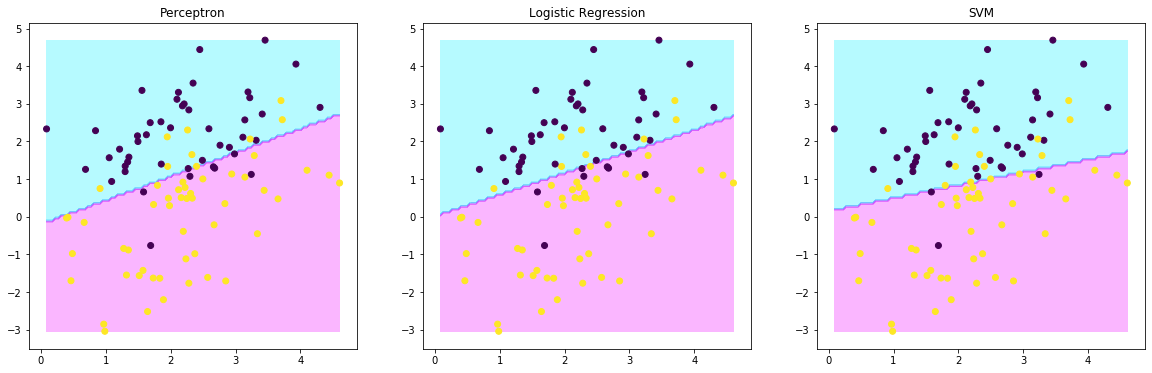

In [27]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

# Replace next three lines with code for learning w using the three methods
w_perceptron = w_perceptron1
w_logistic = w_log
w_svm = w_svm1
fig = plt.figure(figsize=(20,6))
ax = plt.subplot(1,3,1)
plotBoundaries(w_perceptron,Xtrain_i,ytrain)
ax.set_title('Perceptron')

ax = plt.subplot(1,3,2)
plotBoundaries(w_logistic,Xtrain_i,ytrain)
ax.set_title('Logistic Regression')


ax = plt.subplot(1,3,3)
plotBoundaries(w_svm,Xtrain_i,ytrain)
ax.set_title('SVM')
